<a href="https://colab.research.google.com/github/athan37/GameOfThronesAnalysis/blob/main/GameOfThronesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install bert-extractive-summarizer
!pip install text2emotion
!pip install emoji==1.6.3

!gdown 1DIT-N38n24Mwx23RUoqMd4q8hbI1RKiw #Game of thrones data
!gdown 1E3VIKVB0TwUIsHsVSkVspqTMhSqVDYg5 #Game of thrones script
import pandas as pd
from summarizer import Summarizer

meta_data = pd.read_csv("Game_of_Thrones.csv")
scripts = pd.read_csv("Game_of_Thrones_Script.csv")
meta_data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 8.8 MB/s 
     |████████████████████████████████| 182 kB 42.7 MB/s 
     |████████████████████████████████| 7.6 MB 39.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 3.1 MB/s 
     |████████████████████████████████| 240 kB 15.2 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=d4ff927ed831be7e6a860a3034809a40039c7c322818bc2122106a8fec79b879
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████████████████████████

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,Running Time (Minutes),Directed by,Written by,Original Air Date,U.S. Viewers (Millions),Music by,Cinematography by,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Ordered,Filming Duration,Novel(s) Adapted,Synopsis
0,1,1,1,Winter Is Coming,61,Tim Van Patten,"David Benioff, D. B. Weiss",17-Apr-2011,2.22,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.9,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"North of the Seven Kingdoms of Westeros, Night..."
1,1,2,2,The Kingsroad,55,Tim Van Patten,"David Benioff, D. B. Weiss",24-Apr-2011,2.20,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.6,100,8.9,"March 2, 2010",Second half of 2010,A Game of Thrones,"Ned, the new Hand of the King, travels to King..."
2,1,3,3,Lord Snow,57,Brian Kirk,"David Benioff, D. B. Weiss",1-May-2011,2.44,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.5,81,8.7,"March 2, 2010",Second half of 2010,A Game of Thrones,Ned attends the King's Small Council and learn...
3,1,4,4,"Cripples, Bastards, and Broken Things",55,Brian Kirk,Bryan Cogman,8-May-2011,2.45,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.6,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"While returning to King's Landing, Tyrion stop..."
4,1,5,5,The Wolf and the Lion,54,Brian Kirk,"David Benioff, D. B. Weiss",15-May-2011,2.58,Ramin Djawadi,Marco Pontecorvo,Frances Parker,9.0,95,9.0,"March 2, 2010",Second half of 2010,A Game of Thrones,"King Robert's eunuch spy, Varys, has uncovered..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,8,2,69,A Knight of the Seven Kingdoms,57,David Nutter,Bryan Cogman,21-Apr-2019,10.29,Ramin Djawadi,David Franco,Crispin Green,7.9,87,5.9,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,Jaime reveals Cersei's deception to the Targar...
69,8,3,70,The Long Night,81,Miguel Sapochnik,"David Benioff, D. B. Weiss",28-Apr-2019,12.02,Ramin Djawadi,Fabian Wagner,Tim Porter,7.5,74,4.2,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,The living meet the Army of the Dead outside W...
70,8,4,71,The Last of the Starks,77,David Nutter,"David Benioff, D. B. Weiss",5-May-2019,11.80,Ramin Djawadi,David Franco,Katie Weiland,5.5,58,2.9,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,"The survivors mourn, burn the dead and then ce..."
71,8,5,72,The Bells,77,Miguel Sapochnik,"David Benioff, D. B. Weiss",12-May-2019,12.48,Ramin Djawadi,Fabian Wagner,Tim Porter,6.0,49,3.4,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,Varys urges Jon to advance his claim to the th...


In [ ]:
scripts

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.
...,...,...,...,...,...,...
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...
23909,2019-05-19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!


In [10]:
characters_df = pd.DataFrame(scripts[["Season", "Episode", "Name"]])

#joinging entry base on certain attribute
from collections import defaultdict
data = []
mp   = defaultdict(set)
for index, row in characters_df.iterrows():
    mp[(row['Season'], row['Episode'])].add(row['Name'])


data = {'Season' : [], 'Episode' : [], 'Characters' : []}

for (season, ep), characters in mp.items():
    data['Season'].append(season)
    data['Episode'].append(ep)
    data['Characters'].append(list(characters))
characters_df = pd.DataFrame(data = data)

meta_data["Characters"] = characters_df["Characters"]

meta_data

,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,Running Time (Minutes),Directed by,Written by,Original Air Date,U.S. Viewers (Millions),Music by,...,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Ordered,Filming Duration,Novel(s) Adapted,Synopsis,Score,Characters
0,1,1,1,Winter Is Coming,61,Tim Van Patten,"David Benioff, D. B. Weiss",17-Apr-2011,2.22,Ramin Djawadi,...,Oral Norrie Ottey,8.9,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"North of the Seven Kingdoms of Westeros, Night...",9.333333,"[jonrobb, septa mordane, jon snow, robb stark,..."
1,1,2,2,The Kingsroad,55,Tim Van Patten,"David Benioff, D. B. Weiss",24-Apr-2011,2.20,Ramin Djawadi,...,Oral Norrie Ottey,8.6,100,8.9,"March 2, 2010",Second half of 2010,A Game of Thrones,"Ned, the new Hand of the King, travels to King...",9.166667,"[jhiqui, jon snow, robb stark, sansa stark, my..."
2,1,3,3,Lord Snow,57,Brian Kirk,"David Benioff, D. B. Weiss",1-May-2011,2.44,Ramin Djawadi,...,Frances Parker,8.5,81,8.7,"March 2, 2010",Second half of 2010,A Game of Thrones,Ned attends the King's Small Council and learn...,8.433333,"[kings landing guard, barristan selmy, varys, ..."
3,1,4,4,"Cripples, Bastards, and Broken Things",55,Brian Kirk,Bryan Cogman,8-May-2011,2.45,Ramin Djawadi,...,Frances Parker,8.6,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"While returning to King's Landing, Tyrion stop...",9.233333,"[varys, septa mordane, jon snow, robb stark, p..."
4,1,5,5,The Wolf and the Lion,54,Brian Kirk,"David Benioff, D. B. Weiss",15-May-2011,2.58,Ramin Djawadi,...,Frances Parker,9.0,95,9.0,"March 2, 2010",Second half of 2010,A Game of Thrones,"King Robert's eunuch spy, Varys, has uncovered...",9.166667,"[barristan selmy, varys, rodrik cassel, robin ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,8,2,69,A Knight of the Seven Kingdoms,57,David Nutter,Bryan Cogman,21-Apr-2019,10.29,Ramin Djawadi,...,Crispin Green,7.9,87,5.9,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,Jaime reveals Cersei's deception to the Targar...,7.500000,"[jon snow, woman, grey worm, man, wolkan, beri..."
69,8,3,70,The Long Night,81,Miguel Sapochnik,"David Benioff, D. B. Weiss",28-Apr-2019,12.02,Ramin Djawadi,...,Tim Porter,7.5,74,4.2,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,The living meet the Army of the Dead outside W...,6.366667,"[varys, jon snow, woman, grey worm, man, beric..."
70,8,4,71,The Last of the Starks,77,David Nutter,"David Benioff, D. B. Weiss",5-May-2019,11.80,Ramin Djawadi,...,Katie Weiland,5.5,58,2.9,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,"The survivors mourn, burn the dead and then ce...",4.733333,"[gendry baratheon, sam, bran stark, tyrion lan..."
71,8,5,72,The Bells,77,Miguel Sapochnik,"David Benioff, D. B. Weiss",12-May-2019,12.48,Ramin Djawadi,...,Tim Porter,6.0,49,3.4,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,Varys urges Jon to advance his claim to the th...,4.766667,"[varys, owen, jon snow, woman, man, euron grey..."


In [12]:
"""
    Add characters field and scripts field for each characters to the data for each episode

    Easier to do it with pure Python
"""
characters_df = pd.DataFrame(scripts[["Season", "Episode", "Name", "Sentence"]])

#joinging entry base on certain attribute
from collections import defaultdict
data = []
mp   = defaultdict(lambda: defaultdict(list))
for index, row in characters_df.iterrows():
    mp[(row['Season'], row['Episode'])][row['Name']].append(row['Sentence'])

data = {'Season' : [], 'Episode' : [], 'Characters' : [], 'Sentences' : []}

for (season, ep), characters in mp.items():
    data['Season'].append(season)
    data['Episode'].append(ep)
    data['Characters'].append(characters.keys())
    data['Sentences'].append(characters)
characters_df = pd.DataFrame(data = data)

meta_data[["Characters", "Sentences"]] = characters_df[["Characters", "Sentences"]]


meta_data

,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,Running Time (Minutes),Directed by,Written by,Original Air Date,U.S. Viewers (Millions),Music by,...,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Ordered,Filming Duration,Novel(s) Adapted,Synopsis,Score,Characters,Sentences
0,1,1,1,Winter Is Coming,61,Tim Van Patten,"David Benioff, D. B. Weiss",17-Apr-2011,2.22,Ramin Djawadi,...,8.9,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"North of the Seven Kingdoms of Westeros, Night...",9.333333,"(waymar royce, will, gared, royce, jon snow, s...",{'waymar royce': ['What do you expect? They're...
1,1,2,2,The Kingsroad,55,Tim Van Patten,"David Benioff, D. B. Weiss",24-Apr-2011,2.20,Ramin Djawadi,...,8.6,100,8.9,"March 2, 2010",Second half of 2010,A Game of Thrones,"Ned, the new Hand of the King, travels to King...",9.166667,"(jorah mormont, daenerys targaryen, doreah, ir...","{'jorah mormont': ['You need to drink, child....."
2,1,3,3,Lord Snow,57,Brian Kirk,"David Benioff, D. B. Weiss",1-May-2011,2.44,Ramin Djawadi,...,8.5,81,8.7,"March 2, 2010",Second half of 2010,A Game of Thrones,Ned attends the King's Small Council and learn...,8.433333,"(kings landing guard, eddard stark, jory casse...","{'kings landing guard': ['Welcome, Lord Stark...."
3,1,4,4,"Cripples, Bastards, and Broken Things",55,Brian Kirk,Bryan Cogman,8-May-2011,2.45,Ramin Djawadi,...,8.6,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"While returning to King's Landing, Tyrion stop...",9.233333,"(old nan, theon greyjoy, bran stark, tyrion la...",{'old nan': ['The little Lordo s been dreaming...
4,1,5,5,The Wolf and the Lion,54,Brian Kirk,"David Benioff, D. B. Weiss",15-May-2011,2.58,Ramin Djawadi,...,9.0,95,9.0,"March 2, 2010",Second half of 2010,A Game of Thrones,"King Robert's eunuch spy, Varys, has uncovered...",9.166667,"(eddard stark, barristan selmy, lancel lannist...",{'eddard stark': ['Does Ser Hugh have any fami...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,8,2,69,A Knight of the Seven Kingdoms,57,David Nutter,Bryan Cogman,21-Apr-2019,10.29,Ramin Djawadi,...,7.9,87,5.9,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,Jaime reveals Cersei's deception to the Targar...,7.500000,"(daenerys targaryen, jaime lannister, tyrion l...","{'daenerys targaryen': ['When I was a child, m..."
69,8,3,70,The Long Night,81,Miguel Sapochnik,"David Benioff, D. B. Weiss",28-Apr-2019,12.02,Ramin Djawadi,...,7.5,74,4.2,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,The living meet the Army of the Dead outside W...,6.366667,"(northman, soldier, man, lyanna, edd, melisand...","{'northman': ['Oi!', 'Mind out.', 'MOVE!', 'Lo..."
70,8,4,71,The Last of the Starks,77,David Nutter,"David Benioff, D. B. Weiss",5-May-2019,11.80,Ramin Djawadi,...,5.5,58,2.9,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,"The survivors mourn, burn the dead and then ce...",4.733333,"(jon snow, man, gendry baratheon, sandor clega...",{'jon snow': ['We're here to say goodbye to ou...
71,8,5,72,The Bells,77,Miguel Sapochnik,"David Benioff, D. B. Weiss",12-May-2019,12.48,Ramin Djawadi,...,6.0,49,3.4,"July 30, 2016",October 2017 – July 2018,Outline from A Dream of Spring and original co...,Varys urges Jon to advance his claim to the th...,4.766667,"(varys, martha, jon snow, tyrion lannister, da...","{'varys': ['Come in.', 'And?', 'Nothing?', 'We..."


# Character Lists and Scripts

This section contains code that gathers a list of characters from each seasona and creates a master list of characters that appear in at least 2 seasons. The code here also gets the combined script of each character for each season and their combined script for the whole series.

In [ ]:
from collections import Counter

# create sets to hold the characters from each season
season1Chars = set()
season2Chars = set()
season3Chars = set()
season4Chars = set()
season5Chars = set()
season6Chars = set()
season7Chars = set()
season8Chars = set()

# master list with all characters that appear in at least 2 seasons
allSeasonsChars = []

# loop through each episode to gather characters from each episode of each season and add to respective set
for i in range(73):
  if meta_data["Season"].iloc[i] == 1:
    charKeys = meta_data["Sentences"].iloc[i].keys()
    season1Chars |= set(charKeys)

  elif meta_data["Season"].iloc[i] == 2:
    charKeys = meta_data["Sentences"].iloc[i].keys()
    season2Chars |= set(charKeys)

  elif meta_data["Season"].iloc[i] == 3:
    charKeys = meta_data["Sentences"].iloc[i].keys()
    season3Chars |= set(charKeys)

  elif meta_data["Season"].iloc[i] == 4:
    charKeys = meta_data["Sentences"].iloc[i].keys()
    season4Chars |= set(charKeys)

  elif meta_data["Season"].iloc[i] == 5:
    charKeys = meta_data["Sentences"].iloc[i].keys()
    season5Chars |= set(charKeys)

  elif meta_data["Season"].iloc[i] == 6:
    charKeys = meta_data["Sentences"].iloc[i].keys()
    season6Chars |= set(charKeys)

  elif meta_data["Season"].iloc[i] == 7:
    charKeys = meta_data["Sentences"].iloc[i].keys()
    season7Chars |= set(charKeys)

  elif meta_data["Season"].iloc[i] == 8:
    charKeys = meta_data["Sentences"].iloc[i].keys()
    season8Chars |= set(charKeys)

# temp list to make master list, which has all characters that appear in at least 2 seasons
seasonCharsList = list(season1Chars) + list(season2Chars) + list(season3Chars) + list(season4Chars) + list(season5Chars) + list(season6Chars) + list(season7Chars) + list(season8Chars)

# counts how many seasons and then checks counter to make sure at least 2
characterBySeasonCounter = Counter(seasonCharsList)
for char in characterBySeasonCounter:
  if characterBySeasonCounter[char] >= 2:
    allSeasonsChars.append(char)


In [ ]:
# dictionary for the characters and their scripts
season1CharScriptDict = {}
season2CharScriptDict = {}
season3CharScriptDict = {}
season4CharScriptDict = {}
season5CharScriptDict = {}
season6CharScriptDict = {}
season7CharScriptDict = {}
season8CharScriptDict = {}
allSeasonsCharScriptDict = {}

# loop through rows once again, but now we will get the characters scripts if they are in the master list
for i in range(73):
  if meta_data["Season"].iloc[i] == 1:
    charKeys = meta_data["Sentences"].iloc[i].keys()
    # goes through characters in each episode
    for char in charKeys:
      # only add characters' scripts if in master list
      if char in allSeasonsChars:
        # add to character's season script list in respective season dict
        if char in season1CharScriptDict:
          season1CharScriptDict[char] += meta_data["Sentences"].iloc[i][char]
        else:
          season1CharScriptDict[char] = meta_data["Sentences"].iloc[i][char]

        # add to character's overall script list in dict for all seasons
        if char in allSeasonsCharScriptDict:
          allSeasonsCharScriptDict[char] += meta_data["Sentences"].iloc[i][char]
        else:
          allSeasonsCharScriptDict[char] = meta_data["Sentences"].iloc[i][char]

  elif meta_data["Season"].iloc[i] == 2:
    charKeys = meta_data["Sentences"].iloc[i].keys()
    season2Chars |= set(charKeys)
    for char in charKeys:
      if char in allSeasonsChars:
        if char in season2CharScriptDict:
          season2CharScriptDict[char] += meta_data["Sentences"].iloc[i][char]
        else:
          season2CharScriptDict[char] = meta_data["Sentences"].iloc[i][char]
        
        if char in allSeasonsCharScriptDict:
          allSeasonsCharScriptDict[char] += meta_data["Sentences"].iloc[i][char]
        else:
          allSeasonsCharScriptDict[char] = meta_data["Sentences"].iloc[i][char]

  elif meta_data["Season"].iloc[i] == 3:
    charKeys = meta_data["Sentences"].iloc[i].keys()
    season3Chars |= set(charKeys)
    for char in charKeys:
      if char in allSeasonsChars:
        if char in season3CharScriptDict:
          season3CharScriptDict[char] += meta_data["Sentences"].iloc[i][char]
        else:
          season3CharScriptDict[char] = meta_data["Sentences"].iloc[i][char]
        
        if char in allSeasonsCharScriptDict:
          allSeasonsCharScriptDict[char] += meta_data["Sentences"].iloc[i][char] 
        else:
          allSeasonsCharScriptDict[char] = meta_data["Sentences"].iloc[i][char]

  elif meta_data["Season"].iloc[i] == 4:
    charKeys = meta_data["Sentences"].iloc[i].keys()
    season4Chars |= set(charKeys)
    for char in charKeys:
      if char in allSeasonsChars:
        if char in season4CharScriptDict:
          season4CharScriptDict[char] += meta_data["Sentences"].iloc[i][char]
        else:
          season4CharScriptDict[char] = meta_data["Sentences"].iloc[i][char]
        
        if char in allSeasonsCharScriptDict:
          allSeasonsCharScriptDict[char] += meta_data["Sentences"].iloc[i][char]
        else:
          allSeasonsCharScriptDict[char] = meta_data["Sentences"].iloc[i][char]

  elif meta_data["Season"].iloc[i] == 5:
    charKeys = meta_data["Sentences"].iloc[i].keys()
    season5Chars |= set(charKeys)
    for char in charKeys:
      if char in allSeasonsChars:
        if char in season5CharScriptDict:
          season5CharScriptDict[char] += meta_data["Sentences"].iloc[i][char]
        else:
          season5CharScriptDict[char] = meta_data["Sentences"].iloc[i][char]
        
        if char in allSeasonsCharScriptDict:
          allSeasonsCharScriptDict[char] += meta_data["Sentences"].iloc[i][char]
        else:
          allSeasonsCharScriptDict[char] = meta_data["Sentences"].iloc[i][char]

  elif meta_data["Season"].iloc[i] == 6:
    charKeys = meta_data["Sentences"].iloc[i].keys()
    season6Chars |= set(charKeys)
    for char in charKeys:
      if char in allSeasonsChars:
        if char in season6CharScriptDict:
          season6CharScriptDict[char] += meta_data["Sentences"].iloc[i][char]
        else:
          season6CharScriptDict[char] = meta_data["Sentences"].iloc[i][char]
        
        if char in allSeasonsCharScriptDict:
          allSeasonsCharScriptDict[char] += meta_data["Sentences"].iloc[i][char]
        else:
          allSeasonsCharScriptDict[char] = meta_data["Sentences"].iloc[i][char]

  elif meta_data["Season"].iloc[i] == 7:
    charKeys = meta_data["Sentences"].iloc[i].keys()
    season7Chars |= set(charKeys)
    for char in charKeys:
      if char in allSeasonsChars:
        if char in season7CharScriptDict:
          season7CharScriptDict[char] += meta_data["Sentences"].iloc[i][char]
        else:
          season7CharScriptDict[char] = meta_data["Sentences"].iloc[i][char]
        
        if char in allSeasonsCharScriptDict:
          allSeasonsCharScriptDict[char] += meta_data["Sentences"].iloc[i][char]
        else:
          allSeasonsCharScriptDict[char] = meta_data["Sentences"].iloc[i][char]

  elif meta_data["Season"].iloc[i] == 8:
    charKeys = meta_data["Sentences"].iloc[i].keys()
    season8Chars |= set(charKeys)
    for char in charKeys:
      if char in allSeasonsChars:
        if char in season8CharScriptDict:
          season8CharScriptDict[char] += meta_data["Sentences"].iloc[i][char]
        else:
          season8CharScriptDict[char] = meta_data["Sentences"].iloc[i][char]

        if char in allSeasonsCharScriptDict:
          allSeasonsCharScriptDict[char] += meta_data["Sentences"].iloc[i][char]
        else:
          allSeasonsCharScriptDict[char] = meta_data["Sentences"].iloc[i][char]



In [ ]:
# for each character in each season with saved scripts, change dict value from
# list of strings to one long string for ease of working with
for char in season1CharScriptDict:
  season1CharScriptDict[char] = " ".join(season1CharScriptDict[char])

for char in season2CharScriptDict:
  season2CharScriptDict[char] = " ".join(season2CharScriptDict[char])

for char in season3CharScriptDict:
  season3CharScriptDict[char] = " ".join(season3CharScriptDict[char])

for char in season4CharScriptDict:
  season4CharScriptDict[char] = " ".join(season4CharScriptDict[char])

for char in season5CharScriptDict:
  season5CharScriptDict[char] = " ".join(season5CharScriptDict[char])

for char in season6CharScriptDict:
  season6CharScriptDict[char] = " ".join(season6CharScriptDict[char])

for char in season7CharScriptDict:
  season7CharScriptDict[char] = " ".join(season7CharScriptDict[char])

for char in season8CharScriptDict:
  season8CharScriptDict[char] = " ".join(season8CharScriptDict[char])

for char in allSeasonsCharScriptDict:
  allSeasonsCharScriptDict[char] = " ".join(allSeasonsCharScriptDict[char])

# sort the dictionary of characters and their scripts for all seasons by the length of their string
# then, print just the top 5 for comparison and data visualization
charsByScriptLen = sorted(allSeasonsCharScriptDict, key = lambda key: len(allSeasonsCharScriptDict[key]), reverse = True)
top5ScriptLengths = charsByScriptLen[:5]
print(top5ScriptLengths)



['tyrion lannister', 'cersei lannister', 'daenerys targaryen', 'jon snow', 'jaime lannister']


In [ ]:
print(charsByScriptLen)

['tyrion lannister', 'cersei lannister', 'daenerys targaryen', 'jon snow', 'jaime lannister', 'sansa stark', 'petyr baelish', 'davos', 'varys', 'arya stark', 'eddard stark', 'tywin lannister', 'theon greyjoy', 'jorah mormont', 'sam', 'stannis baratheon', 'bronn', 'brienne', 'robb stark', 'catelyn stark', 'olenna tyrell', 'ramsay bolton', 'sparrow', 'melisandre', 'bran stark', 'joffrey lannister', 'margaery tyrell', 'sandor clegane', 'ygritte', 'man', 'missandei', 'daario', 'yara greyjoy', 'tormund', 'sam tarly', 'talisa', 'gendry baratheon', 'osha', 'thoros', 'shae', 'jaqen hghar', 'qyburn', 'euron greyjoy', 'alliser thorne', 'mance', 'gilly', 'roose', 'barristan', 'tommen lannister', 'sandor', 'beric', 'pycelle', 'podrick', 'yoren', 'grey worm', 'locke', 'shireen', 'walder', 'balon', 'lancel', 'jojen', 'loras', 'hot pie', 'meera', 'alliser', 'maester aemon', 'ros', 'doran', 'edmure', 'hizdahr', 'brynden', 'ellaria', 'grenn', 'luwin', 'randyll', 'doreah', 'janos', 'lyanna', 'roose bolt

# Summaries of Character Scripts

The code in this section gets the summaries of the scripts for the top 5 characters with most speaking parts.

In [ ]:
from torch import result_type
sumModel = Summarizer()

# for each of the top 5 characters with the most speaking parts, summarize their scripts for each season and print
for char in top5ScriptLengths:
  print("Summaries of " + char + "'s scripts from each season: ")

  if char in season1CharScriptDict.keys():
    sum1 = sumModel(season1CharScriptDict[char], num_sentences = 5)
    print("Season 1: " + sum1)

  if char in season2CharScriptDict.keys():
    sum2 = sumModel(season2CharScriptDict[char], num_sentences = 5)
    print("Season 2: " + sum2)

  if char in season3CharScriptDict.keys():
    sum3 = sumModel(season3CharScriptDict[char], num_sentences = 5)
    print("Season 3: " + sum3)

  if char in season4CharScriptDict.keys():
    sum4 = sumModel(season4CharScriptDict[char], num_sentences = 5)
    print("Season 4: " + sum4)

  if char in season5CharScriptDict.keys():
    sum5 = sumModel(season5CharScriptDict[char], num_sentences = 5)
    print("Season 5: " + sum5)

  if char in season6CharScriptDict.keys():
    sum6 = sumModel(season6CharScriptDict[char], num_sentences = 5)
    print("Season 6: " + sum6)

  if char in season7CharScriptDict.keys():
    sum7 = sumModel(season7CharScriptDict[char], num_sentences = 5)
    print("Season 7: " + sum7)

  if char in season8CharScriptDict.keys():
    sum8 = sumModel(season8CharScriptDict[char], num_sentences = 5)
    print("Season 8: " + sum8 + "\n")



Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Summaries of tyrion lannister's scripts from each season: 
Season 1: It is true what they say about the Northern girls. And I know that our enemies hate each other almost as much as they hate us. With the Tyrell army and the Dornish on our side, we have powerful allies in the south. I can't speak to prophecies or visions in the flames, but I like Jon Snow and I trusted him, and I am an excellent judge of character. And sometimes there's more to foreign invaders than northern fools that meets the eye.
Season 2: You, you're going to be bigger than the Hound, but much better looking. . For men in our position, holding grudges can be an encumbrance, don't you think? You served my family well in the matter of the succession. It's just you, me and Joffrey, the Lord of the Seven Kingdoms and Protector of the Realm. He'll have his Kingsguard protecting him.
Season 3: The man who cut me lost more than his nose. A fair enough repayment for putting your spear through my would-be killer's face, wo

# Emotion and Sentiment Analysis
This section contains code to run emotion and sentiment analyses on the top 5 speaking characters and visualizes this data.

In [ ]:
import text2emotion as te
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('omw-1.4')
import os

# create sentiment analyzer
sid = SentimentIntensityAnalyzer()

# dictionaries to store text2emotion and sentiment analyses for visualization
teDict = {}
saDict = {}

# for each of the top 10 characters with the most speaking parts, print their emotions by seasona and sentiment
for char in top5ScriptLengths:
  print("Emotion and sentiment analysis of " + char + " in each season: ")

  # create dictionary entries for each character, which will become a list of dictionaries
  teDict[char] = []
  saDict[char] = []

  # checks if the character is in the season, then does emotion and standard sentiment analysis 
  if char in season1CharScriptDict.keys():
    te1 = te.get_emotion(season1CharScriptDict[char])
    teDict[char].append(te1)
    sa1 = sid.polarity_scores(season1CharScriptDict[char])
    saDict[char].append(sa1)

    print("Season 1: " + str(te1))
    print("          " + str(sa1))

  if char in season2CharScriptDict.keys():
    te2 = te.get_emotion(season2CharScriptDict[char])
    teDict[char].append(te2)
    sa2 = sid.polarity_scores(season2CharScriptDict[char])
    saDict[char].append(sa2)

    print("Season 2: " + str(te2))
    print("          " + str(sa2))

  if char in season3CharScriptDict.keys():
    te3 = te.get_emotion(season3CharScriptDict[char])
    teDict[char].append(te3)
    sa3 = sid.polarity_scores(season3CharScriptDict[char])
    saDict[char].append(sa3)

    print("Season 3: " + str(te3))
    print("          " + str(sa3))

  if char in season4CharScriptDict.keys():
    te4 = te.get_emotion(season4CharScriptDict[char])
    teDict[char].append(te4)
    sa4 = sid.polarity_scores(season4CharScriptDict[char])
    saDict[char].append(sa4)

    print("Season 4: " + str(te4))
    print("          " + str(sa4))

  if char in season5CharScriptDict.keys():
    te5 = te.get_emotion(season5CharScriptDict[char])
    teDict[char].append(te5)
    sa5 = sid.polarity_scores(season5CharScriptDict[char])
    saDict[char].append(sa5)

    print("Season 5: " + str(te5))
    print("          " + str(sa5))

  if char in season6CharScriptDict.keys():
    te6 = te.get_emotion(season6CharScriptDict[char])
    teDict[char].append(te6)
    sa6 = sid.polarity_scores(season6CharScriptDict[char])
    saDict[char].append(sa6)

    print("Season 6: " + str(te6))
    print("          " + str(sa6))

  if char in season7CharScriptDict.keys():
    te7 = te.get_emotion(season7CharScriptDict[char])
    teDict[char].append(te7)
    sa7 = sid.polarity_scores(season7CharScriptDict[char])
    saDict[char].append(sa7)

    print("Season 7: " + str(te7))
    print("          " + str(sa7))

  if char in season8CharScriptDict.keys():
    te8 = te.get_emotion(season8CharScriptDict[char])
    teDict[char].append(te8)
    sa8 = sid.polarity_scores(season8CharScriptDict[char])
    saDict[char].append(sa8)

    print("Season 8: " + str(te8))
    print("          " + str(sa8) + "\n")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Emotion and sentiment analysis of tyrion lannister in each season: 
Season 1: {'Happy': 0.16, 'Angry': 0.1, 'Surprise': 0.18, 'Sad': 0.26, 'Fear': 0.3}
          {'neg': 0.152, 'neu': 0.686, 'pos': 0.162, 'compound': 0.9998}
Season 2: {'Happy': 0.17, 'Angry': 0.1, 'Surprise': 0.16, 'Sad': 0.29, 'Fear': 0.28}
          {'neg': 0.166, 'neu': 0.677, 'pos': 0.157, 'compound': -0.9981}
Season 3: {'Happy': 0.15, 'Angry': 0.09, 'Surprise': 0.17, 'Sad': 0.24, 'Fear': 0.35}
          {'neg': 0.147, 'neu': 0.688, 'pos': 0.165, 'compound': 0.9919}
Season 4: {'Happy': 0.16, 'Angry': 0.08, 'Surprise': 0.19, 'Sad': 0.26, 'Fear': 0.3}
          {'neg': 0.171, 'neu': 0.684, 'pos': 0.145, 'compound': -0.9994}
Season 5: {'Happy': 0.17, 'Angry': 0.09, 'Surprise': 0.18, 'Sad': 0.25, 'Fear': 0.3}
          {'neg': 0.123, 'neu': 0.713, 'pos': 0.165, 'compound': 0.9992}
Season 6: {'Happy': 0.22, 'Angry': 0.07, 'Surprise': 0.13, 'Sad': 0.23, 'Fear': 0.35}
          {'neg': 0.112, 'neu': 0.707, 'pos': 0.181, '

ddd

In [ ]:
#creating an aggregate of each season's ratings
meta_data['Rotten Tomatoes Rating (Percentage) Standard'] = meta_data['Rotten Tomatoes Rating (Percentage)']/10
meta_data['Overall Rating'] = meta_data['Rotten Tomatoes Rating (Percentage) Standard'] + meta_data['Metacritic Ratings'] + meta_data['IMDb Rating'] + meta_data["U.S. Viewers (Millions)"]
meta_data


season_ratings = {}
season_ratings["1"] = 0
season_ratings["2"] = 0
season_ratings["3"] = 0
season_ratings["4"] = 0
season_ratings["5"] = 0
season_ratings["6"] = 0
season_ratings["7"] = 0
season_ratings["8"] = 0

for i in range(73):
    if meta_data["Season"].iloc[i] == 1:
        curr = meta_data["Overall Rating"].iloc[i]
        season_ratings["1"] += curr
    elif meta_data["Season"].iloc[i] == 2:
        curr = meta_data["Overall Rating"].iloc[i]
        season_ratings["2"] += curr
    elif meta_data["Season"].iloc[i] == 3:
        curr = meta_data["Overall Rating"].iloc[i]
        season_ratings["3"] += curr
    elif meta_data["Season"].iloc[i] == 4:
        curr = meta_data["Overall Rating"].iloc[i]
        season_ratings["4"] += curr
    elif meta_data["Season"].iloc[i] == 5:
        curr = meta_data["Overall Rating"].iloc[i]
        season_ratings["5"] += curr
    elif meta_data["Season"].iloc[i] == 6:
        curr = meta_data["Overall Rating"].iloc[i]
        season_ratings["6"] += curr
    elif meta_data["Season"].iloc[i] == 7:
        curr = meta_data["Overall Rating"].iloc[i]
        season_ratings["7"] += curr
    elif meta_data["Season"].iloc[i] == 8:
        curr = meta_data["Overall Rating"].iloc[i]
        season_ratings["8"] += curr


In [ ]:
# Determine % of dialogue spoken by each character per season

#top loop gets the total number of characters in entire script
#bottom loop creates a dict of character: % of dialogue
#ie. characterA: (# of characterA/total number of characters in script)

total_char_count1 = 0
individual_char_count1 = {}    
for char in season1CharScriptDict:
    curr = len(season1CharScriptDict[char])
    total_char_count1 += curr
    individual_char_count1[char] = curr

for char in individual_char_count1:
    individual_char_count1[char] = (individual_char_count1[char]/total_char_count1) * 100
    
total_char_count2 = 0
individual_char_count2 = {}    
for char in season2CharScriptDict:
    curr = len(season2CharScriptDict[char])
    total_char_count2 += curr
    individual_char_count2[char] = curr

for char in individual_char_count2:
    individual_char_count2[char] = (individual_char_count2[char]/total_char_count2) * 100

total_char_count3 = 0
individual_char_count3 = {}    
for char in season3CharScriptDict:
    curr = len(season3CharScriptDict[char])
    total_char_count3 += curr
    individual_char_count3[char] = curr

for char in individual_char_count3:
    individual_char_count3[char] = (individual_char_count3[char]/total_char_count3) * 100   
    
total_char_count4 = 0
individual_char_count4 = {}    
for char in season4CharScriptDict:
    curr = len(season4CharScriptDict[char])
    total_char_count4 += curr
    individual_char_count4[char] = curr

for char in individual_char_count4:
    individual_char_count4[char] = (individual_char_count4[char]/total_char_count4) * 100
    
total_char_count5 = 0
individual_char_count5 = {}    
for char in season5CharScriptDict:
    curr = len(season5CharScriptDict[char])
    total_char_count5 += curr
    individual_char_count5[char] = curr

for char in individual_char_count5:
    individual_char_count5[char] = (individual_char_count5[char]/total_char_count5) * 100
    
total_char_count6 = 0
individual_char_count6 = {}    
for char in season6CharScriptDict:
    curr = len(season6CharScriptDict[char])
    total_char_count6 += curr
    individual_char_count6[char] = curr

for char in individual_char_count6:
    individual_char_count6[char] = (individual_char_count6[char]/total_char_count6) * 100
    
total_char_count7 = 0
individual_char_count7 = {}    
for char in season7CharScriptDict:
    curr = len(season7CharScriptDict[char])
    total_char_count7 += curr
    individual_char_count7[char] = curr

for char in individual_char_count7:
    individual_char_count7[char] = (individual_char_count7[char]/total_char_count7) * 100
    
total_char_count8 = 0
individual_char_count8 = {}    
for char in season8CharScriptDict:
    curr = len(season8CharScriptDict[char])
    total_char_count8 += curr
    individual_char_count8[char] = curr


for char in individual_char_count8:
    individual_char_count8[char] = float((individual_char_count8[char]/total_char_count8) * 100)
   

#looking at only the top 5 most speaking characters 
charsByScriptPercent1 = sorted(individual_char_count1, key = lambda key: (individual_char_count1[key]), reverse = True)
top5ScriptLengthsPerecent1 = charsByScriptPercent1[:5]

charsByScriptPercent2 = sorted(individual_char_count2, key = lambda key: (individual_char_count2[key]), reverse = True)
top5ScriptLengthsPerecent2 = charsByScriptPercent2[:5]

charsByScriptPercent3 = sorted(individual_char_count3, key = lambda key: (individual_char_count3[key]), reverse = True)
top5ScriptLengthsPerecent3 = charsByScriptPercent3[:5]

charsByScriptPercent4 = sorted(individual_char_count4, key = lambda key: (individual_char_count4[key]), reverse = True)
top5ScriptLengthsPerecent4 = charsByScriptPercent4[:5]

charsByScriptPercent5 = sorted(individual_char_count5, key = lambda key: (individual_char_count5[key]), reverse = True)
top5ScriptLengthsPerecent5 = charsByScriptPercent5[:5]

charsByScriptPercent6 = sorted(individual_char_count6, key = lambda key: (individual_char_count6[key]), reverse = True)
top5ScriptLengthsPerecent6 = charsByScriptPercent6[:5]

charsByScriptPercent7 = sorted(individual_char_count7, key = lambda key: (individual_char_count7[key]), reverse = True)
top5ScriptLengthsPerecent7 = charsByScriptPercent7[:5]

charsByScriptPercent8 = sorted(individual_char_count8, key = lambda key: (individual_char_count8[key]), reverse = True)
top5ScriptLengthsPerecent8 = charsByScriptPercent8[:5]

most_speaking_chars1 = {key:val for key, val in individual_char_count1.items() if key in top5ScriptLengthsPerecent1}
most_speaking_chars2 = {key:val for key, val in individual_char_count2.items() if key in top5ScriptLengthsPerecent2}
most_speaking_chars3 = {key:val for key, val in individual_char_count3.items() if key in top5ScriptLengthsPerecent3}
most_speaking_chars4 = {key:val for key, val in individual_char_count4.items() if key in top5ScriptLengthsPerecent4}
most_speaking_chars5 = {key:val for key, val in individual_char_count5.items() if key in top5ScriptLengthsPerecent5}
most_speaking_chars6 = {key:val for key, val in individual_char_count6.items() if key in top5ScriptLengthsPerecent6}
most_speaking_chars7 = {key:val for key, val in individual_char_count7.items() if key in top5ScriptLengthsPerecent7}
most_speaking_chars8 = {key:val for key, val in individual_char_count8.items() if key in top5ScriptLengthsPerecent8}



Text(0.5, 1.0, 'Season 8')

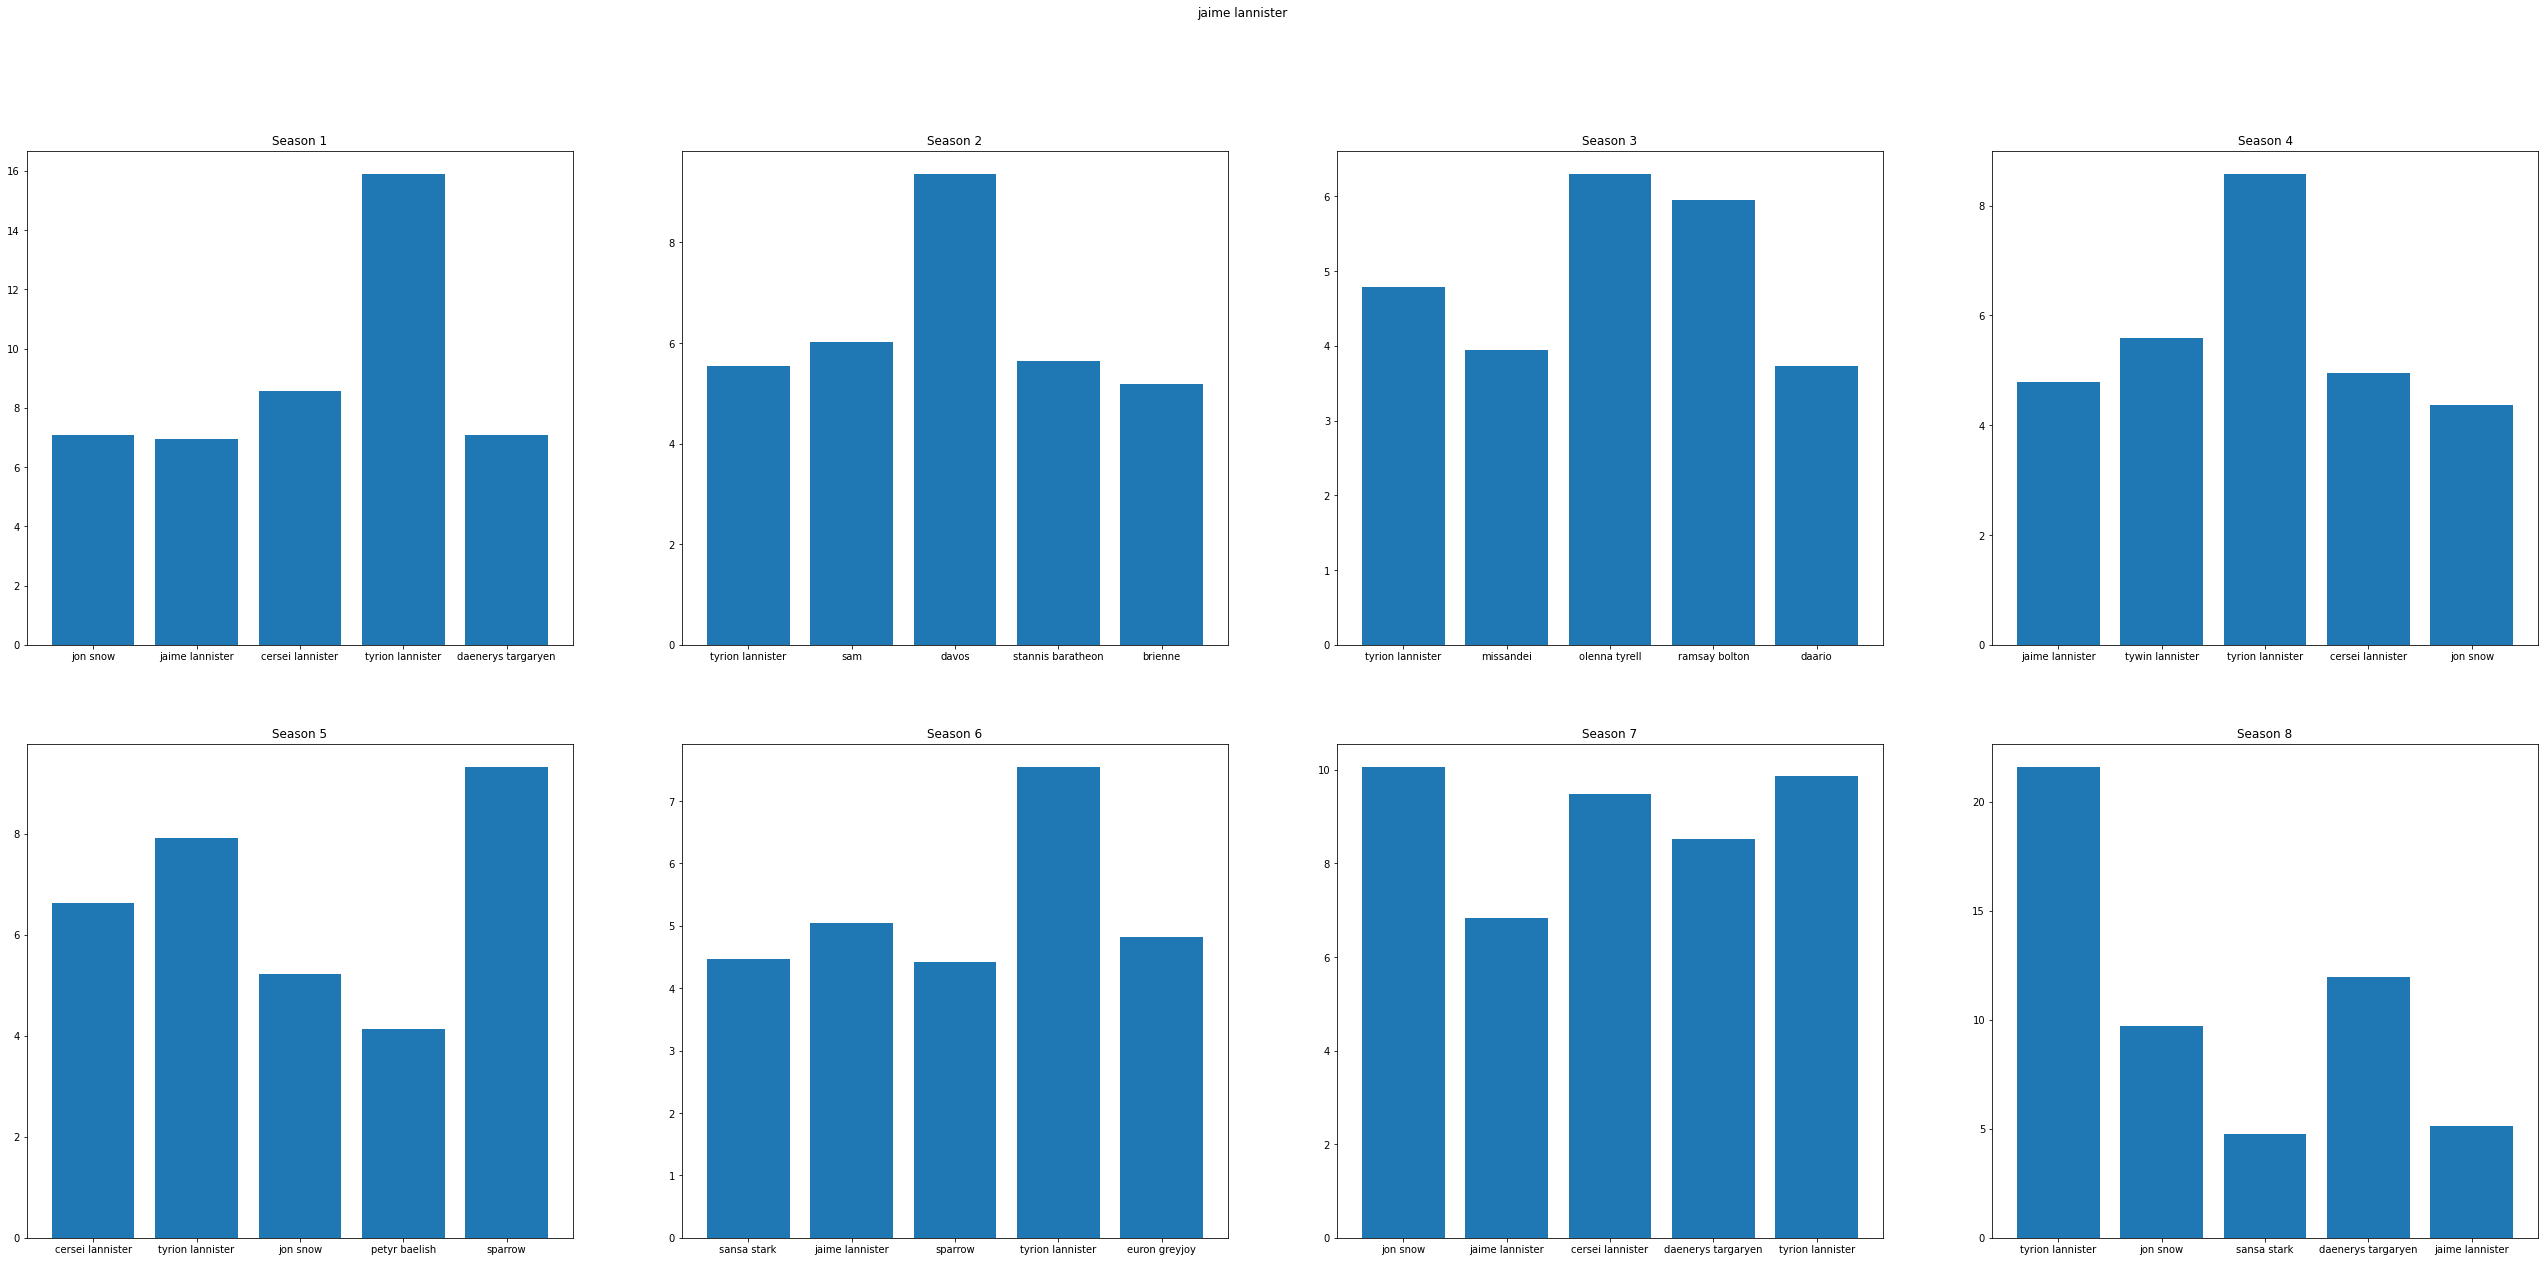

In [ ]:
import  matplotlib.pylab as plt

#Plot each season's top 5 most speaking characters

plt.figure(figsize=(45,20))
plt.suptitle(char)
plt.subplot(2,4,1)
data = most_speaking_chars1
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names)
plt.title("Season 1")


plt.suptitle(char)
plt.subplot(2,4,2)
data = most_speaking_chars2
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names)
plt.title("Season 2")


plt.suptitle(char)
plt.subplot(2,4,3)
data = most_speaking_chars3
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names)
plt.title("Season 3")


plt.suptitle(char)
plt.subplot(2,4,4)
data = most_speaking_chars4
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names)
plt.title("Season 4")


plt.suptitle(char)
plt.subplot(2,4,5)
data = most_speaking_chars5
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names)
plt.title("Season 5")


plt.suptitle(char)
plt.subplot(2,4,6)
data = most_speaking_chars6
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names)
plt.title("Season 6")


plt.suptitle(char)
plt.subplot(2,4,7)
data = most_speaking_chars7
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names)
plt.title("Season 7")


plt.suptitle(char)
plt.subplot(2,4,8)
data = most_speaking_chars8
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names)
plt.title("Season 8")

Text(0.5, 1.0, 'Seasons Aggregate Ratings')

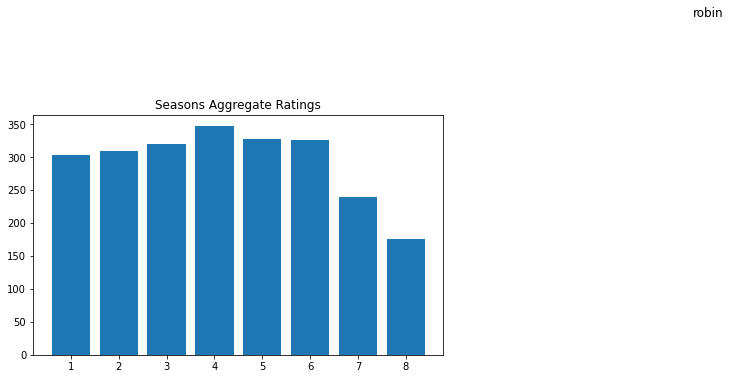

In [ ]:
#Plot the season's aggregated ratings so you we can make observations about character dialogue<>popularity
plt.figure(figsize=(25,15))
plt.suptitle(char)
plt.subplot(3,3,1)
data = season_ratings
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names)
plt.title("Seasons Aggregate Ratings")

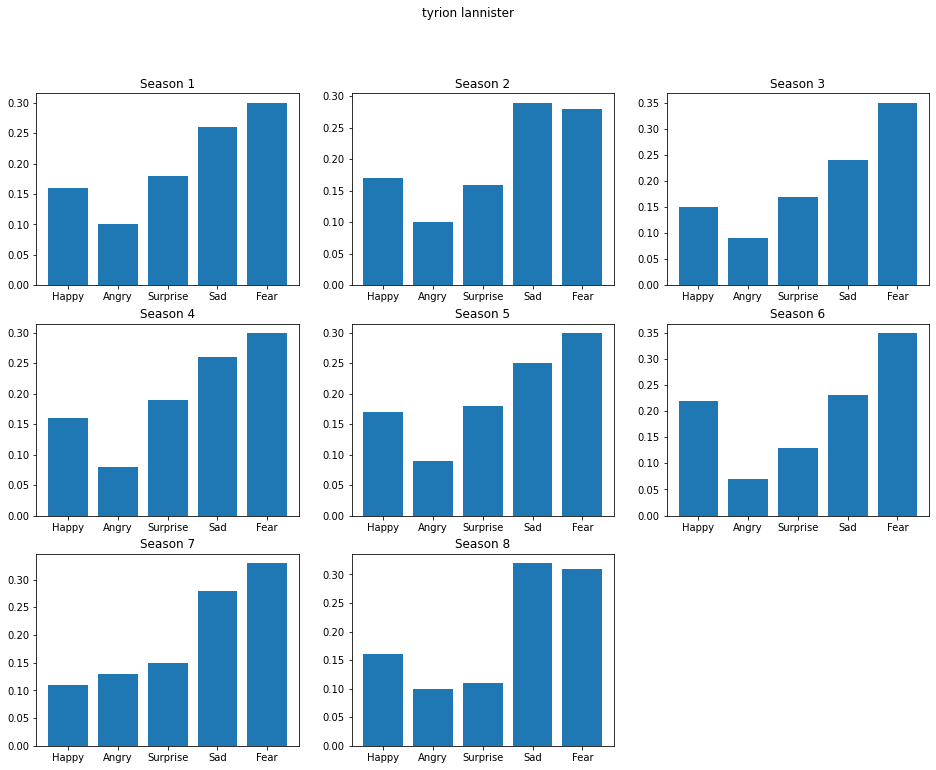

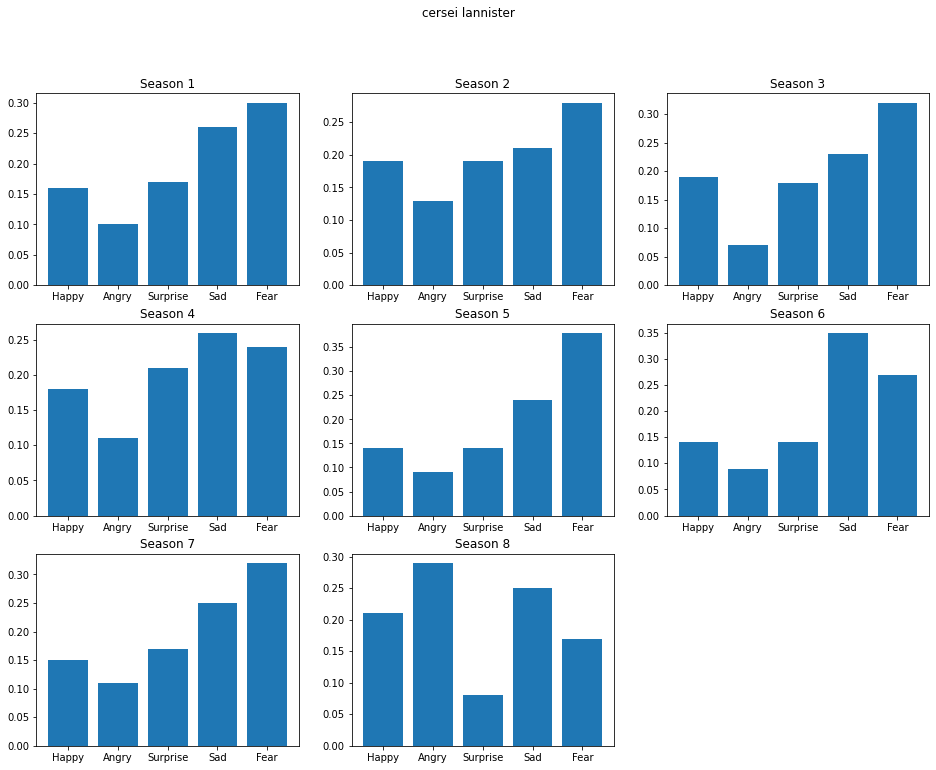

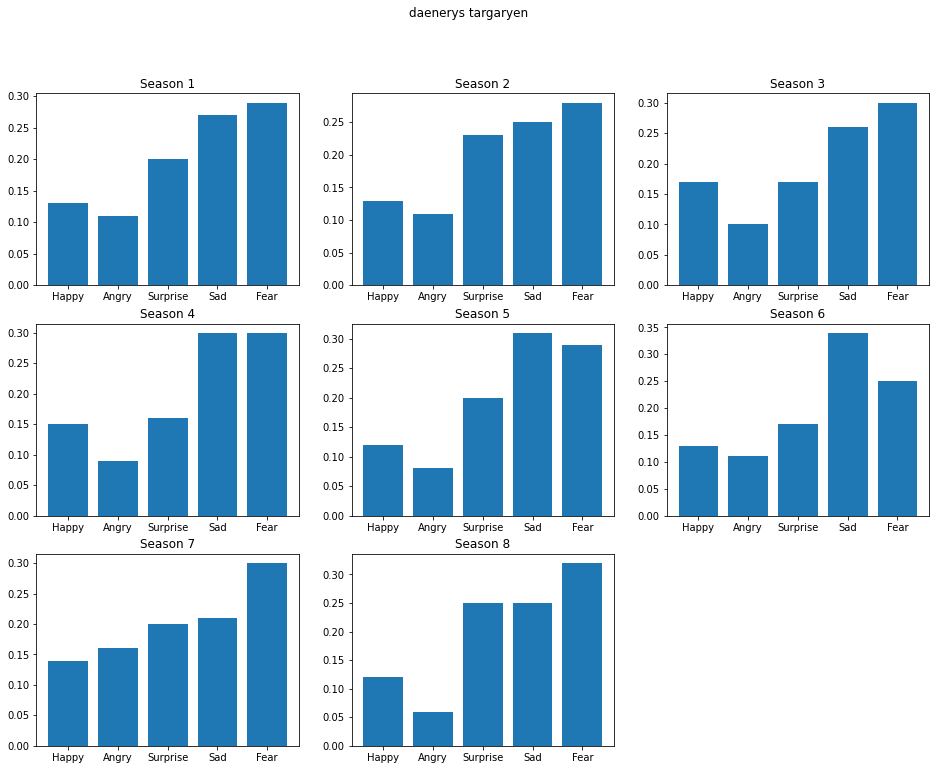

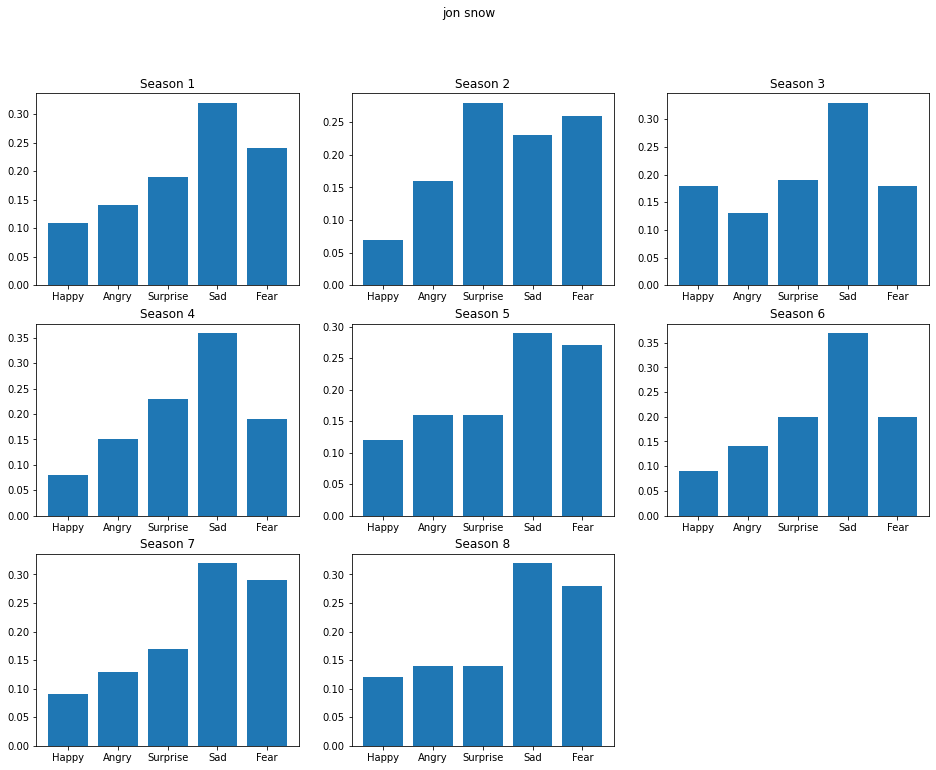

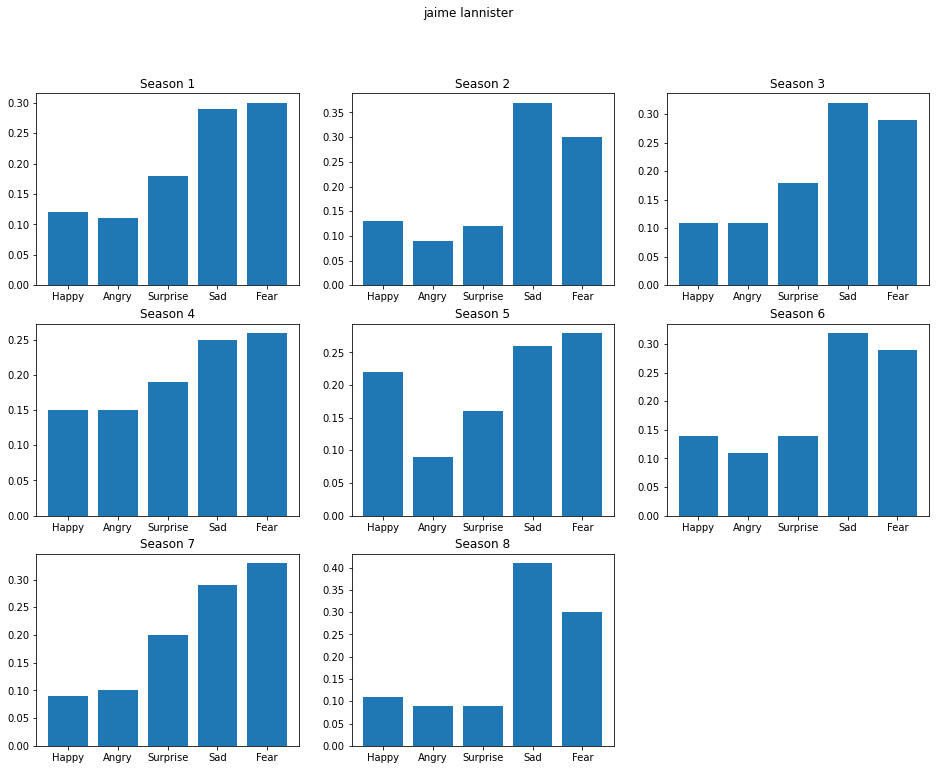

In [ ]:
import  matplotlib.pylab as plt

# plot text2emotion for each character for each season


for char in top5ScriptLengths:
  plt.figure(figsize=(16,12))
  plt.suptitle(char)
  plt.subplot(3,3,1)
  data = teDict[char][0]
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title("Season 1")

  plt.subplot(3,3,2)
  data = teDict[char][1]
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title("Season 2")

  plt.subplot(3,3,3)
  data = teDict[char][2]
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title("Season 3")

  plt.subplot(3,3,4)
  data = teDict[char][3]
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title("Season 4")

  plt.subplot(3,3,5)
  data = teDict[char][4]
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title("Season 5")

  plt.subplot(3,3,6)
  data = teDict[char][5]
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title("Season 6")

  plt.subplot(3,3,7)
  data = teDict[char][6]
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title("Season 7")

  plt.subplot(3,3,8)
  data = teDict[char][7]
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title("Season 8")

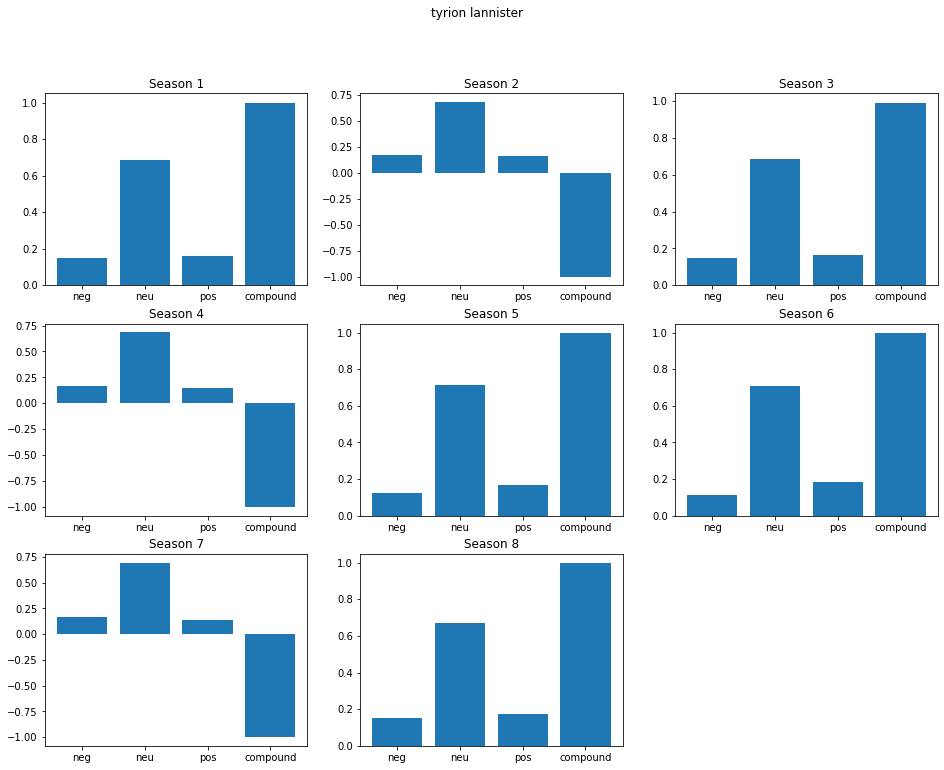

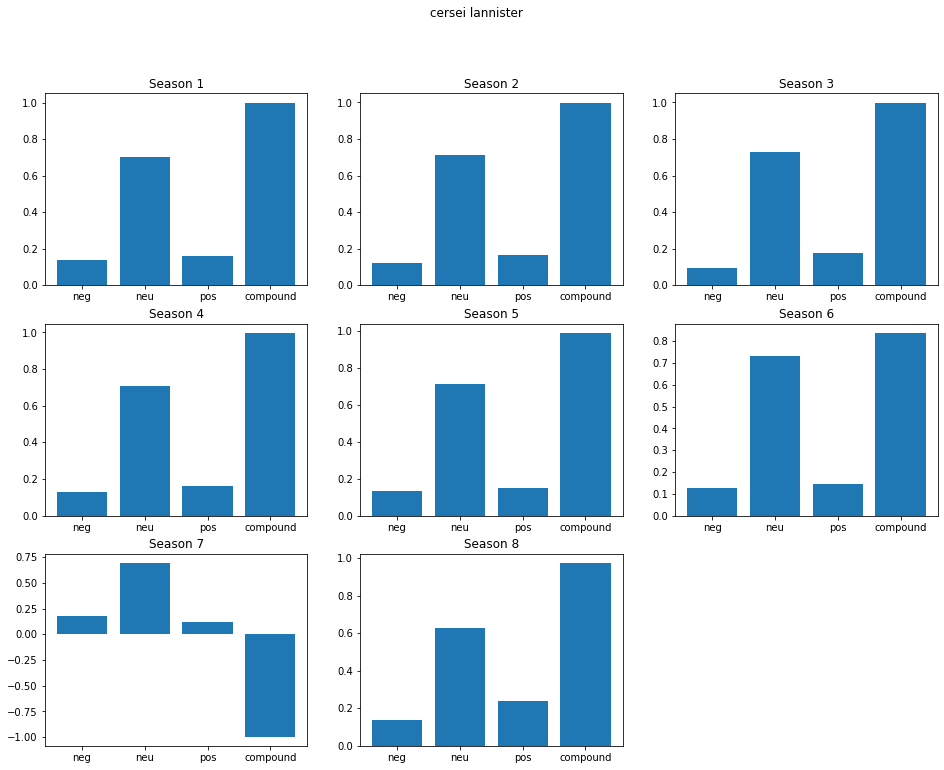

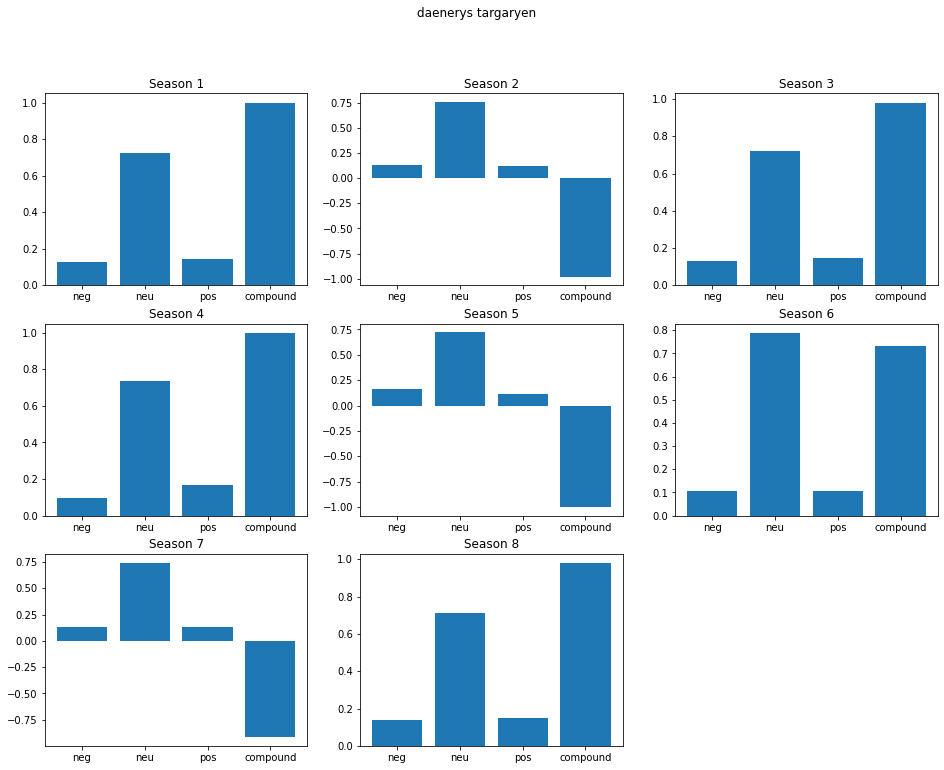

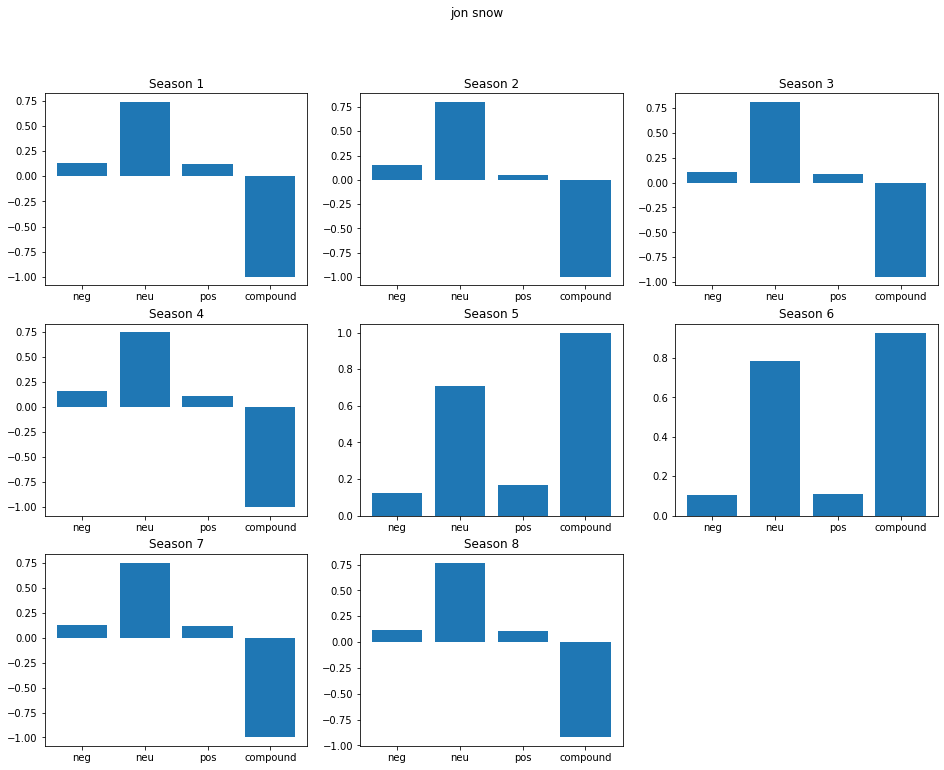

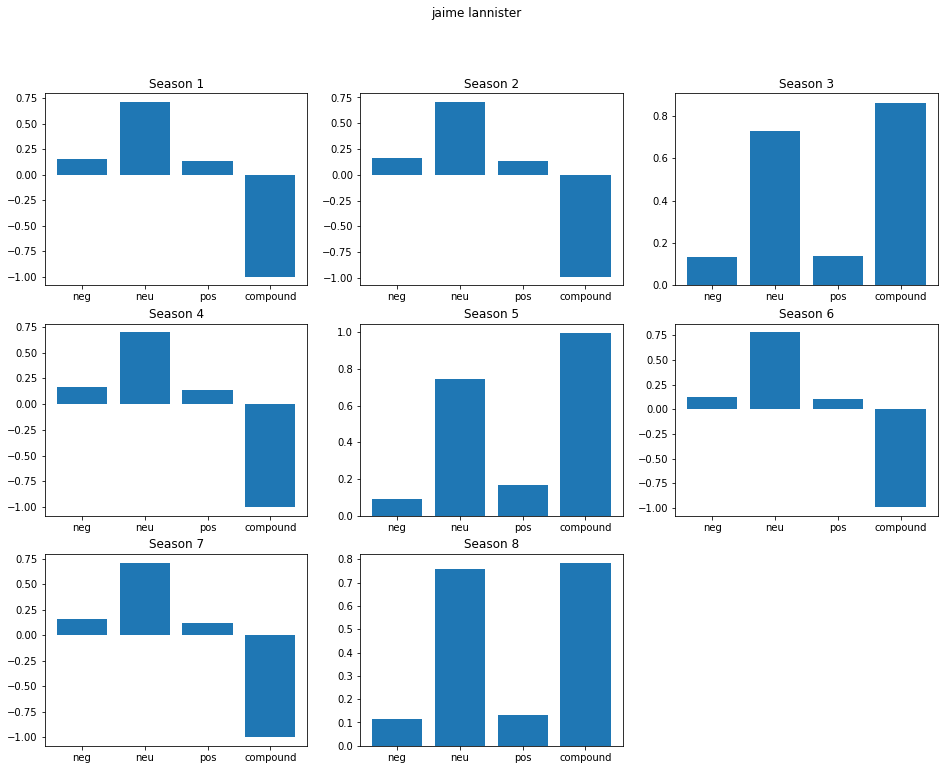

In [ ]:
# plot sentiment analysis for each character in each season



for char in top5ScriptLengths:

  plt.figure(figsize=(16,12))
  plt.suptitle(char)
  plt.subplot(3,3,1)
  data = saDict[char][0]
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title("Season 1")

  plt.subplot(3,3,2)
  data = saDict[char][1]
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title("Season 2")

  plt.subplot(3,3,3)
  data = saDict[char][2]
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title("Season 3")

  plt.subplot(3,3,4)
  data = saDict[char][3]
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title("Season 4")

  plt.subplot(3,3,5)
  data = saDict[char][4]
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title("Season 5")

  plt.subplot(3,3,6)
  data = saDict[char][5]
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title("Season 6")

  plt.subplot(3,3,7)
  data = saDict[char][6]
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title("Season 7")

  plt.subplot(3,3,8)
  data = saDict[char][7]
  names = list(data.keys())
  values = list(data.values())
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title("Season 8")

Find important characters, in other word, the one that talks the most

- Put them all into a scripts object
- Count the number of word they said and ranking
- Get top 5?

In [ ]:
from collections import defaultdict
sentences = meta_data["Sentences"]
scripts = defaultdict(str)

for row in sentences:
    for name, script in row.items():
        for line in script:
            scripts[name] += line


sorted_script = sorted(scripts.items(), key=lambda x : len(x[-1].split()), reverse=True)

top_5 = set([person for person, _ in sorted_script[:5]])

top_5

{'cersei lannister',
 'daenerys targaryen',
 'jaime lannister',
 'jon snow',
 'tyrion lannister'}

Plot some word cloud? Just to have some figures


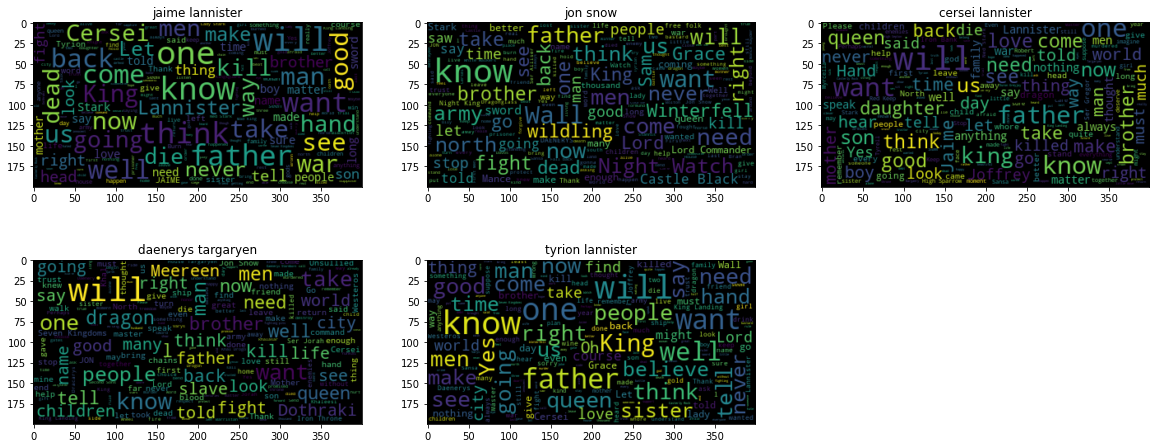

In [ ]:
from wordcloud import WordCloud
import  matplotlib.pylab as plt

def plot_word_cloud(text, subtitle, index):
    if index == 1:
      plt.figure(figsize=(20, 8))
      plt.subplot(2, 3, index)
      plt.title(subtitle)
      plt.imshow(WordCloud(max_font_size=40).generate(text), interpolation="bilinear")
    else:
      plt.subplot(2, 3, index)
      plt.title(subtitle)
      plt.imshow(WordCloud(max_font_size=40).generate(text), interpolation="bilinear")

index = 1
for person in top_5:
    plot_word_cloud(scripts[person], person, index)
    index += 1

Preprocess function from Lab 7, for cleaning words

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Get list of stopwords and add a few
stop_words = set(stopwords.words('english'))

def get_clean_words(text, exclude_words=[]):
    """Given some text, return a list of clean words.

    Input
    -----
        text : str
        exclude_words : list
            Words to exclude (e.g. characters own name)

    Output
    ------
        words : list

    Example
    -------
        >>> my_text = get_clean_text('Iron Man', 'heroes')
        >>> my_words = get_clean_words(my_text, exclude_words=['Iron', 'Man'])
    """

    # Extarct words
    words = word_tokenize(text)

    # Add exclude words to words to give it same treatment
    words += exclude_words

    # Convert to lower case
    words = [w.lower() for w in words]

    # Clear punctuation
    table = str.maketrans('', '', string.punctuation)
    words = [w.translate(table) for w in words]

    # Seperate words and exclude words
    if len(exclude_words) > 0:
        exclude_words = words[-len(exclude_words):]
        words = words[:-len(exclude_words)]

    # Remove non-alphabetic words
    words = [w for w in words if w.isalpha()]

    # Remove stop words
    words = [w for w in words if not w in stop_words | set(exclude_words)]

    # Remove single letter words
    words = [w for w in words if len(w) > 1]

    return words

Important word for a character: Ex - For "Grenn"

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tdidf_character(character):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(get_clean_words(scripts[character]))
    vectorizer.get_feature_names_out()

    vectorizer.idf_
    vectorizer.get_feature_names_out()

    tf_idf = pd.DataFrame([vectorizer.get_feature_names_out() ,vectorizer.idf_]).T

    tf_idf.columns = ["Word", "Score"]
    return tf_idf.sort_values(by="Score", ascending=False)

tdidf_character("grenn")

,Word,Score
223,wall,7.112575
118,looking,7.112575
91,hitwhat,7.112575
41,crownswhat,7.112575
40,crownsi,7.112575
...,...,...
71,get,5.097672
220,us,5.097672
23,ca,5.033134
243,yield,4.861284


Create training data + test data from top_5 from characters and their scripts

In [ ]:
from sklearn import preprocessing
features, labels = [], []

for row in sentences:
    for name, script in row.items():
        if name in top_5:
            for line in script:
                features.append(line)
                labels.append(name)

le = preprocessing.LabelEncoder()
df = pd.DataFrame([features, le.fit_transform(labels)]).T
df.columns = ["Text", "Label"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Text, df.Label, test_size=0.20, stratify=df.Label, random_state=2012)

y_train = y_train.astype('int')
y_test  = y_test.astype('int')

Train the classifier and test result


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin

class CleanText(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.X = self.y = None

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = [" ".join(get_clean_words(line)) for line in X]
        return X


pipeline = Pipeline([
    ('clean', CleanText()),
    ('tfidf', TfidfVectorizer()),
    ('classifier', KNeighborsClassifier())
])

pipeline.fit(X_train, y_train)

prediction = pipeline.predict(X_test)

print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.59      0.53      0.56       631
           1       0.59      0.53      0.56       678
           2       0.49      0.61      0.54       418
           3       0.62      0.45      0.52       887
           4       0.49      0.68      0.57       728

    accuracy                           0.55      3342
   macro avg       0.56      0.56      0.55      3342
weighted avg       0.56      0.55      0.55      3342



## Percentage of speaking for each character vs film's rating (combined from rotten, metacritic, ...)

Create a score column

In [13]:
meta_data["Score"] = (meta_data["IMDb Rating"] + meta_data["Rotten Tomatoes Rating (Percentage)"] / 10 + meta_data["Metacritic Ratings"]) / 3

Get percentage of talking for each episode for each character

In [14]:
import numpy as np
characters = set()
for row in meta_data["Characters"]: characters.update(row) #Columns

characters = list(characters)
#Build array
map_idx  = {character : i for i, character in enumerate(characters)}
map_name = {i : character for i, character in enumerate(characters)}

features  = []
labels    = meta_data["Score"]
sentences = meta_data["Sentences"]

for row in sentences:
    total_word = 0

    data_row = np.asarray([0] * len(characters))
    for character, script in row.items():
        words_per_script = len(" ".join(script).split())
        total_word += words_per_script
        data_row[map_idx[character]] = words_per_script
    data_row = data_row / total_word if total_word > 0 else data_row

    features.append(data_row)

features = np.asarray(features)

Correlation between percent of each character versus film's rating

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(features, labels)

print("Correlation between percent of speaking vs rating", reg.score(features, labels))

Correlation between percent of speaking vs rating 1.0


Using RandomForestRegressor to train the model and print out the feature importance base on that

Text(0.5, 0, 'Feature Importance')

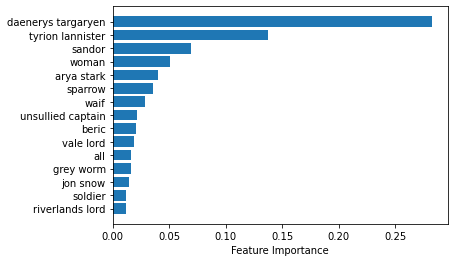

In [16]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

reg = RandomForestRegressor(n_estimators=50)
reg.fit(features, labels)

indexes = reg.feature_importances_.argsort()[::-1][:15][::-1]
plt.barh(np.asarray(characters)[indexes], reg.feature_importances_[indexes])
plt.xlabel("Feature Importance")